In [1]:
# Initialize and Import Required Modules

In [2]:
# General Libraries
import torch
import argparse
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:


# Test cifar 122



In [4]:
# Import the MNIST Autoencoder file
import CIFAR10_122  

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define arguments
args = argparse.Namespace(
    data_path="../data",
    batch_size=128,
    latent_dim=128,
    device=device
)

In [5]:
#Load the Dataset and Check It

Files already downloaded and verified


Files already downloaded and verified


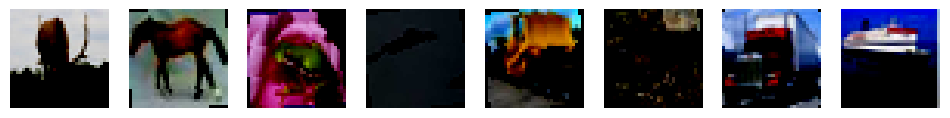

In [6]:
# Load dataset
train_loader, val_loader, test_loader = CIFAR10_122.load_data(args)

# Retrieve a batch of images
images_0_1, _ = next(iter(train_loader))

# Convert images to range [0,255] for proper display
images_0_255 = images_0_1 * 255  # Scale if needed

# Visualize some images
fig, axes = plt.subplots(1, 8, figsize=(12, 4))
for i in range(8):
    img = images_0_255[i].permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    img = np.clip(img, 0, 255).astype("uint8")  # Ensure valid pixel values
    axes[i].imshow(img)
    axes[i].axis("off")

plt.show()


In [7]:
#Verify the Autoencoder Model Architecture

In [8]:
# Initialize model
encoder_model = CIFAR10_122.Encoder(args.latent_dim).to(args.device)

# Print model summary
print(encoder_model)

Encoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(128, 128, kernel_size=(8, 8), stride=(1, 1))
  )
)


In [9]:
# Initialize model
classifier_model = CIFAR10_122.Classifier(args.latent_dim).to(args.device)

# Print model summary
print(classifier_model)

Classifier(
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [10]:
#Train the model

In [11]:
CIFAR10_122.train_encoder_classifier(encoder_model, classifier_model, train_loader, val_loader, args, epochs=40)

Epoch [1/40], Train Loss: 1.8510, Train Acc: 30.60%, Val Loss: 1.4955, Val Acc: 46.28%


Epoch [2/40], Train Loss: 1.5452, Train Acc: 43.02%, Val Loss: 1.2707, Val Acc: 54.32%


Epoch [3/40], Train Loss: 1.3779, Train Acc: 50.14%, Val Loss: 1.2023, Val Acc: 56.47%


Epoch [4/40], Train Loss: 1.2454, Train Acc: 55.49%, Val Loss: 1.0652, Val Acc: 60.74%


Epoch [5/40], Train Loss: 1.1599, Train Acc: 58.85%, Val Loss: 0.9887, Val Acc: 64.56%


Epoch [6/40], Train Loss: 1.0943, Train Acc: 61.53%, Val Loss: 0.9612, Val Acc: 65.33%


Epoch [7/40], Train Loss: 1.0367, Train Acc: 63.64%, Val Loss: 0.9285, Val Acc: 67.25%


Epoch [8/40], Train Loss: 1.0017, Train Acc: 65.17%, Val Loss: 0.8909, Val Acc: 68.63%


Epoch [9/40], Train Loss: 0.9680, Train Acc: 66.53%, Val Loss: 0.9311, Val Acc: 67.34%


Epoch [10/40], Train Loss: 0.9279, Train Acc: 67.84%, Val Loss: 0.8453, Val Acc: 70.65%


Epoch [11/40], Train Loss: 0.8253, Train Acc: 71.72%, Val Loss: 0.7652, Val Acc: 73.04%


Epoch [12/40], Train Loss: 0.7937, Train Acc: 72.87%, Val Loss: 0.7461, Val Acc: 73.39%


Epoch [13/40], Train Loss: 0.7716, Train Acc: 73.19%, Val Loss: 0.7411, Val Acc: 73.85%


Epoch [14/40], Train Loss: 0.7611, Train Acc: 73.58%, Val Loss: 0.7415, Val Acc: 74.26%


Epoch [15/40], Train Loss: 0.7468, Train Acc: 74.48%, Val Loss: 0.7321, Val Acc: 74.24%


Epoch [16/40], Train Loss: 0.7481, Train Acc: 74.00%, Val Loss: 0.7293, Val Acc: 74.56%


Epoch [17/40], Train Loss: 0.7366, Train Acc: 74.62%, Val Loss: 0.7231, Val Acc: 74.69%


Epoch [18/40], Train Loss: 0.7254, Train Acc: 74.91%, Val Loss: 0.7228, Val Acc: 74.42%


Epoch [19/40], Train Loss: 0.7171, Train Acc: 75.25%, Val Loss: 0.7159, Val Acc: 74.93%


Epoch [20/40], Train Loss: 0.7131, Train Acc: 75.27%, Val Loss: 0.7132, Val Acc: 75.04%


Epoch [21/40], Train Loss: 0.6950, Train Acc: 76.03%, Val Loss: 0.6980, Val Acc: 75.30%


Epoch [22/40], Train Loss: 0.6940, Train Acc: 75.78%, Val Loss: 0.7037, Val Acc: 75.25%


Epoch [23/40], Train Loss: 0.6920, Train Acc: 75.90%, Val Loss: 0.7025, Val Acc: 75.52%


Epoch [24/40], Train Loss: 0.6882, Train Acc: 76.05%, Val Loss: 0.7052, Val Acc: 75.34%


Epoch [25/40], Train Loss: 0.6884, Train Acc: 76.19%, Val Loss: 0.6955, Val Acc: 75.42%


Epoch [26/40], Train Loss: 0.6913, Train Acc: 76.14%, Val Loss: 0.7055, Val Acc: 75.42%


Epoch [27/40], Train Loss: 0.6899, Train Acc: 76.17%, Val Loss: 0.7026, Val Acc: 75.70%


Epoch [28/40], Train Loss: 0.6798, Train Acc: 76.42%, Val Loss: 0.7005, Val Acc: 75.16%


Epoch [29/40], Train Loss: 0.6885, Train Acc: 76.30%, Val Loss: 0.7018, Val Acc: 75.49%


Epoch [30/40], Train Loss: 0.6867, Train Acc: 76.21%, Val Loss: 0.6997, Val Acc: 75.84%


Epoch [31/40], Train Loss: 0.6825, Train Acc: 76.39%, Val Loss: 0.7036, Val Acc: 75.37%


Epoch [32/40], Train Loss: 0.6835, Train Acc: 76.25%, Val Loss: 0.7034, Val Acc: 75.10%


Epoch [33/40], Train Loss: 0.6828, Train Acc: 76.28%, Val Loss: 0.7025, Val Acc: 75.68%


Epoch [34/40], Train Loss: 0.6807, Train Acc: 76.44%, Val Loss: 0.6972, Val Acc: 75.45%


Epoch [35/40], Train Loss: 0.6823, Train Acc: 76.46%, Val Loss: 0.6942, Val Acc: 75.66%


Epoch [36/40], Train Loss: 0.6827, Train Acc: 76.25%, Val Loss: 0.7011, Val Acc: 75.12%


Epoch [37/40], Train Loss: 0.6877, Train Acc: 76.47%, Val Loss: 0.7005, Val Acc: 75.87%


Epoch [38/40], Train Loss: 0.6839, Train Acc: 76.35%, Val Loss: 0.6982, Val Acc: 75.47%


Epoch [39/40], Train Loss: 0.6855, Train Acc: 76.36%, Val Loss: 0.6969, Val Acc: 75.87%


Epoch [40/40], Train Loss: 0.6803, Train Acc: 76.48%, Val Loss: 0.6965, Val Acc: 75.70%
